# Interpolation of data tables

We can access tables of data for sulphuric acid mixtures. I can get values for $H_0$, $H_R$, $a_{H_2O}$ and Density at values of $\% H_2SO_4$. I can then create interp[olation functions that will allow me to closely estimate these values at any $\% H_2SO_4$.

In [51]:
### IMPORTANT: RUN THE CODE BLOCK AT THE END OF THIS NOTEBOOK TO LOAD THE INTERPOLATION LIBRARY

##############################################################
### Set up libraries and global variables
##############################################################

H0_Data_File_Name = "02_H0_H2SO4_Tickle_1970.csv"
#H0_Data_File_Name = "02_H0_H2SO4_Gillespie_1971.csv"   ### Alternate data Files. Some may need editing of the code below.
#H0_Data_File_Name = "02_H0_H2SO4_Johnston_1969.csv"
#H0_Data_File_Name = "02_H0_H2SO4_Jorgenson_1963.csv"
#H0_Data_File_Name = "02_H0_H2SO4_Paul_1957A.csv"
#H0_Data_File_Name = "02_H0_H2SO4_Paul_1957B.csv"

HR_Data_File_Name = "04_Deno_1955_HR_Values.csv"
#HR_Data_File_Name = "04_Cook_1975_HR_Values.csv"

aH2O_Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"

density_Data_File_Name = "03_H2SO4_PercentWt_to_MolarConc_CRC.csv"
#density_Data_File_Name = "03_H2SO4_PercentWt_to_MolarConc.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress

from statsmodels.nonparametric.smoothers_lowess import lowess     # A function for interpolating a plot using the locally weighed scatterplot smoothing method. Returns smoothed x,y points
from scipy.interpolate import CubicSpline                         # A function for interpolating a plot using the cubic spline method. Returns an interpolation function.
from scipy.interpolate import interp1d                            # A function for interpolating a plot using the connect-the-dots method. Returns an interpolation function.
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

from matplotlib.patches import PathPatch
from matplotlib.path import Path


#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

molwtH2SO4 = 98.08
molwtH20 = 18.0
densityH2SO4 = 1.83
densityH2O = 1.000

size = [8,3]

### interpolation = interp1d(x1, y1, kind='linear')
### interpolation = CubicSpline(x1, y1)
### interpolation = scipy.interpolate.make_smoothing_spline(x1, y1, w=None, lam=0.03)



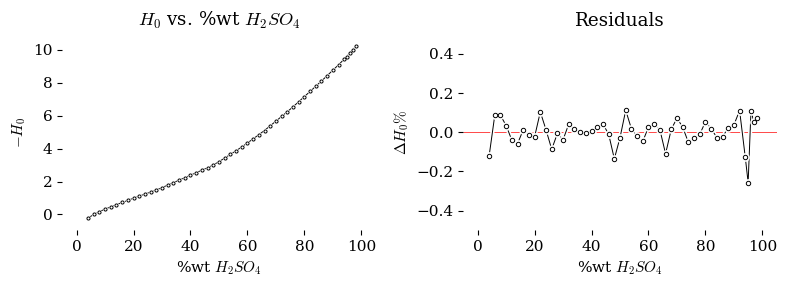

In [52]:
##############################################################
### Import the data and perform calculations
##############################################################

Filename = github_location + H0_Data_File_Name

dfH0 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

 
# ###################################################
### Get the data
###################################################

x = dfH0["%H2SO4"]
y = -dfH0["H0"]


###################################################
### Use Interpolator for %H2SO4 to H0
###################################################

interpoltorH0 = MakeInterpolationFunctionForH0inH2SO4byPercentWt()

step = 0.01
x_smooth = np.arange(np.min(x), np.max(x)+step, step)
y_smooth = -interpoltorH0(x_smooth)


###################################################
### Set up labels for plots
###################################################

x_label = "%wt ${H_2SO_4}$"
y_label = "$-H_0$"

Title0 = "$H_0$ vs. %wt $H_2SO_4$"

Title1 = "Residuals"
y_label_residuals_H0 = "$\Delta H_0 \%$"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=size)  


###################################################
### Make the first plot (plot 0)
###################################################

ax[0].set(
          title = Title0,       
          ylabel=y_label, 
          xlabel=x_label,                
          xlim=[-5,105],                  
#          ylim=[-3.7,-2.7]
       )
ax[0].margins(x=.07, y=.07, tight=True)

# ax[0].axvline(x=30, ymin=0.1, ymax = 0.9, linewidth = 0.5, color = "lightgray", zorder = 0)   # A vertical line highlight

ax[0].scatter(x, y, 
             marker = "o", 
             s = 10, 
             color = "white", 
             linewidths=0.7, 
             zorder = 2)
ax[0].scatter(x, y, 
             marker = "o", 
             s = 5, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)


#ax[0].plot(x, y, "-", color = "black", linewidth=0.7, zorder = 1)
ax[0].plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.7, zorder = 0)


###################################################
### Make the second plot (plot 1)
###################################################

ax[1].set(
          title = Title1,       
          ylabel=y_label_residuals_H0, 
          xlabel=x_label,                
          xlim=[-5,105],                  
          ylim=[-.5,.5]
       )
ax[1].margins(x=.07, y=.07, tight=True)

span = np.max(y) - np.min(y)
diff = y - (-interpoltorH0(x))
percent_diff = diff / span *100

ax[1].scatter(x, percent_diff, 
              marker = "o", 
              s = 30, 
              color = "white", 
              linewidths=0.7, 
              zorder = 2)

ax[1].scatter(x, percent_diff, 
              marker = "o", 
              s = 10, 
              color = "white", 
              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 2)


ax[1].plot(x, percent_diff, "-", color = "white", linewidth=3, zorder = 1)
ax[1].plot(x, percent_diff, "-", color = "black", linewidth=0.7, zorder = 1)
ax[1].hlines(0, -5, 105, color = "red", linewidth=0.5, zorder = 0)

plt.savefig("H0_interp.pdf")
plt.show()





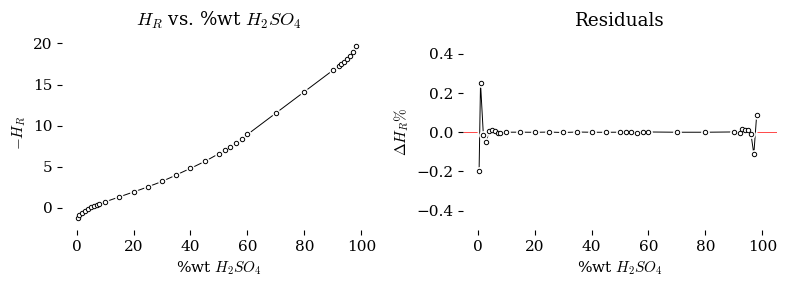

In [53]:
##############################################################
### Import the data and perform calculations
##############################################################

Filename = github_location + HR_Data_File_Name

dfHR = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 
 
# ###################################################
### Get the data
###################################################

xR = dfHR["%H2SO4"]
yR = -dfHR["HR"]

###################################################
### Use Interpolator for %H2SO4 to H0
###################################################

interpoltorHR = MakeInterpolationFunctionForHRinH2SO4byPercentWt()

step = 0.01
xR_smooth = np.arange(np.min(xR), np.max(xR)+step, step)
yR_smooth = -interpoltorHR(xR_smooth)



###################################################
### Set up labels for plots
###################################################

x_label = "%wt ${H_2SO_4}$"
y_label = "$-H_R$"

Title0HR = "$H_R$ vs. %wt $H_2SO_4$"

Title1 = "Residuals"
y_label_residuals_HR = "$\Delta H_R \%$"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)


###################################################
### Make the first plot (plot 0)
###################################################


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=size)  

ax[0].set(
          title = Title0HR,       
          ylabel=y_label, 
          xlabel=x_label,                
          xlim=[-5,105],                  
#          ylim=[-3.7,-2.7]
       )
ax[0].margins(x=.07, y=.07, tight=True)

ax[0].scatter(xR, yR, 
             marker = "o", 
             s = 30, 
             color = "white", 
             linewidths=0.7, 
             zorder = 2)
ax[0].scatter(xR, yR, 
             marker = "o", 
             s = 10, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)


ax[0].plot(xR_smooth, yR_smooth, "-", color = "black", linewidth=0.7, zorder = 1)


###################################################
### Make the second plot (plot 1)
###################################################

ax[1].set(
          title = Title1,       
          ylabel=y_label_residuals_HR, 
          xlabel=x_label,                
          xlim=[-5,105],                  
          ylim=[-0.5,0.5]
       )
ax[1].margins(x=.07, y=.07, tight=True)

span = np.max(yR) - np.min(yR)
diff = yR - (-interpoltorHR(xR))
percent_diff = diff / span *100


ax[1].scatter(xR, percent_diff, 
              marker = "o", 
              s = 30, 
              color = "white", 
              linewidths=0.7, 
              zorder = 2)
ax[1].scatter(xR, percent_diff, 
              marker = "o", 
              s = 10, 
              color = "white", 
              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 2)

ax[1].plot(xR, percent_diff, "-", color = "white", linewidth=3, zorder = 1)
ax[1].plot(xR, percent_diff, "-", color = "black", linewidth=0.7, zorder = 1)
ax[1].hlines(0, -5, 105, color = "red", linewidth=0.5, zorder = 0)

plt.savefig("HR_interp.pdf")
plt.show()

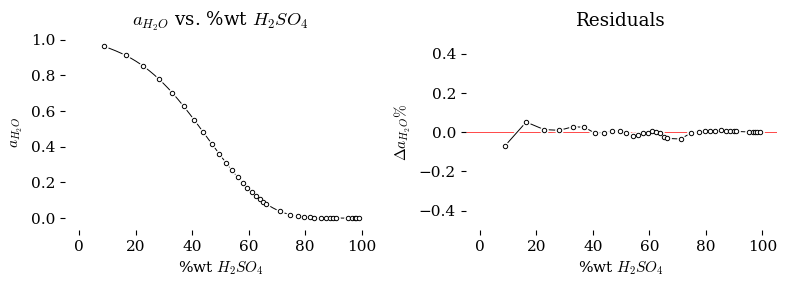

In [57]:
##############################################################
### Import the data and perform calculations
##############################################################

Filename = github_location + aH2O_Data_File_Name

dfHR = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 
 
# ###################################################
### Get the data
###################################################

x = dfHR["%H2SO4"]
y = dfHR["aH2O"]

###################################################
### Use Interpolator for %H2SO4 to H0
###################################################

interpoltor = MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()

step = 0.01
x_smooth = np.arange(np.min(x), np.max(x)+step, step)
y_smooth = interpoltor(x_smooth)



###################################################
### Set up labels for plots
###################################################

x_label = "%wt ${H_2SO_4}$"
y_label = "$a_{H_2O}$"

Title0 = "$a_{H_2O}$ vs. %wt $H_2SO_4$"

Title1 = "Residuals"
y_label_residuals = "$\Delta a_{H_2O} \%$"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)


###################################################
### Make the first plot (plot 0)
###################################################


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=size)  

ax[0].set(
          title = Title0,       
          ylabel=y_label, 
          xlabel=x_label,                
          xlim=[-5,105],                  
#          ylim=[-3.7,-2.7]
       )
ax[0].margins(x=.07, y=.07, tight=True)

ax[0].scatter(x, y, 
             marker = "o", 
             s = 30, 
             color = "white", 
             linewidths=0.7, 
             zorder = 2)
ax[0].scatter(x, y, 
             marker = "o", 
             s = 10, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)


ax[0].plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.7, zorder = 1)


###################################################
### Make the second plot (plot 1)
###################################################

ax[1].set(
          title = Title1,       
          ylabel=y_label_residuals, 
          xlabel=x_label,                
          xlim=[-5,105],                  
          ylim=[-0.5,0.5]
       )
ax[1].margins(x=.07, y=.07, tight=True)

span = np.max(y) - np.min(y)
diff = y - (interpoltor(x))
percent_diff = diff / span *100


ax[1].scatter(x, percent_diff, 
              marker = "o", 
              s = 30, 
              color = "white", 
              linewidths=0.7, 
              zorder = 2)
ax[1].scatter(x, percent_diff, 
              marker = "o", 
              s = 10, 
              color = "white", 
              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 2)

ax[1].plot(x, percent_diff, "-", color = "white", linewidth=3, zorder = 1)
ax[1].plot(x, percent_diff, "-", color = "black", linewidth=0.7, zorder = 1)
ax[1].hlines(0, -5, 105, color = "red", linewidth=0.5, zorder = 0)

plt.savefig("aH2O_interp.pdf")
plt.show()

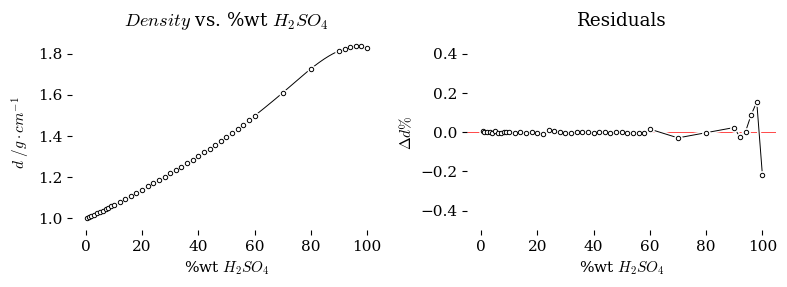

In [59]:
##############################################################
### Import the data and perform calculations
##############################################################

Filename = github_location + density_Data_File_Name

dfHR = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 
 
# ###################################################
### Get the data
###################################################

x = dfHR["%H2SO4"]
y = dfHR["Density"]

###################################################
### Use Interpolator for %H2SO4 to H0
###################################################

interpoltor = MakeInterpolationFunctionForDensityofH2SO4byPercentWt()

step = 0.01
x_smooth = np.arange(np.min(x), np.max(x)+step, step)
y_smooth = interpoltor(x_smooth)



###################################################
### Set up labels for plots
###################################################

x_label = "%wt ${H_2SO_4}$"
y_label = "$d~/g \cdot cm^{-1}$"

Title0 = "$Density$ vs. %wt $H_2SO_4$"

Title1 = "Residuals"
y_label_residuals = "$\Delta d \%$"

###################################################
### Create figure for plot
###################################################

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)


###################################################
### Make the first plot (plot 0)
###################################################


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=size)  

ax[0].set(
          title = Title0,       
          ylabel=y_label, 
          xlabel=x_label,                
          xlim=[-5,105],                  
#          ylim=[-3.7,-2.7]
       )
ax[0].margins(x=.07, y=.07, tight=True)

ax[0].scatter(x, y, 
             marker = "o", 
             s = 30, 
             color = "white", 
             linewidths=0.7, 
             zorder = 2)
ax[0].scatter(x, y, 
             marker = "o", 
             s = 10, 
             color = "white", 
             edgecolors = "black", 
             linewidths=0.7, 
             zorder = 2)


ax[0].plot(x_smooth, y_smooth, "-", color = "black", linewidth=0.7, zorder = 1)


###################################################
### Make the second plot (plot 1)
###################################################

ax[1].set(
          title = Title1,       
          ylabel=y_label_residuals, 
          xlabel=x_label,                
          xlim=[-5,105],                  
          ylim=[-0.5,0.5]
       )
ax[1].margins(x=.07, y=.07, tight=True)

span = np.max(y) - np.min(y)
diff = y - (interpoltor(x))
percent_diff = diff / span *100


ax[1].scatter(x, percent_diff, 
              marker = "o", 
              s = 30, 
              color = "white", 
              linewidths=0.7, 
              zorder = 2)
ax[1].scatter(x, percent_diff, 
              marker = "o", 
              s = 10, 
              color = "white", 
              edgecolors = "black", 
              linewidths=0.7, 
              zorder = 2)

ax[1].plot(x, percent_diff, "-", color = "white", linewidth=3, zorder = 1)
ax[1].plot(x, percent_diff, "-", color = "black", linewidth=0.7, zorder = 1)
ax[1].hlines(0, -5, 105, color = "red", linewidth=0.5, zorder = 0)

plt.savefig("Density_interp.pdf")
plt.show()

# RUN THE CODE BLOCK BELOW FIRST

In [56]:
### IMPORTANT: RUN THIS CODE BLOCK TO LOAD THE INTERPOLATION LIBRARY

###################################################
### Interpolator Functions
###################################################



###################################################
### Create Interpolation Function for H0 from %H2SO4 from Tickle
###################################################

### This function below could be in an external library that you call in your own program.

import pandas as pd
import numpy as np
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.

#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"


def MakeInterpolationFunctionForH0inH2SO4byPercentWt():
    Data_File_Name = "02_H0_H2SO4_Tickle_1970.csv"

    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    x = df["%H2SO4"]
    y = df["H0"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=5)   ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for HR from %H2SO4
###################################################

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForHRinH2SO4byPercentWt():
    Data_File_Name = "04_Deno_1955_HR_Values.csv"
#    Data_File_Name = "04_Cook_1975_HR_Values.csv"

    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    
    x = df["%H2SO4"]
    y = df["HR"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=0.1)  ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for a_H2O by X_H2SO4
###################################################

# The activity of water in 0.01 mole fraction H2SO4 is 0.983

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForH2OActivityinH2SO4byMoleFraction():
    Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"
    
    molwtH2SO4 = 98.08; molwtH20 = 18.0; densityH2SO4 = 1.83; densityH2O = 1.000
    
    Filename = github_location + Data_File_Name
    
    df1 = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    molal = df1["conc H2SO4 / m"]
    mass_add_to_1_kg_water = molal * molwtH2SO4
    total_mass_solution = mass_add_to_1_kg_water + 1000
    percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100
    
    df1["%H2SO4"] = percent_H2SO4
    df1["mole fraction"] = molal / (molal + 1000/molwtH20)
    
    x = df1["mole fraction"]
    y = df1["aH2O"]


    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=5)     ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for a_H2O by % H2SO4
###################################################

# The activity of water in 10% H2SO4 is 0.956

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt():


    Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"

    molwtH2SO4 = 98.08; molwtH20 = 18.0; densityH2SO4 = 1.83; densityH2O = 1.000
    
    Filename = github_location + Data_File_Name
    
    df1 = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    molal = df1["conc H2SO4 / m"]
    mass_add_to_1_kg_water = molal * molwtH2SO4
    total_mass_solution = mass_add_to_1_kg_water + 1000
    percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100
    
    df1["%H2SO4"] = percent_H2SO4
    df1["mole fraction"] = molal / (molal + 1000/molwtH20)

    x = df1["%H2SO4"]
    y = df1["aH2O"]
    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=10)  ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)


###################################################
### Create Interpolation Function for Density from %H2SO4
###################################################

# The Density of 100% H2SO4 is 1.831

### This function below could be in an external library that you call in your own program.

def MakeInterpolationFunctionForDensityofH2SO4byPercentWt():
    Data_File_Name = "03_H2SO4_PercentWt_to_MolarConc_CRC.csv"

    Filename = github_location + Data_File_Name
    
    df = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    y = df['Density']
    x = df['%H2SO4']
    
    interpolation = make_smoothing_spline(x, y,     ### The x and y data
                                          w=None,   ### A list of weights for each point (default = None)
                                          lam=5)  ### A factor for the degree of smoothing. Change this to change the smoothness.

    return(interpolation)




###################################################
### Switcher function
###################################################


# This code runs only in python 3.10 or above versions
def select_interpolator(parameter):
    match parameter:
        case "H0":
            return MakeInterpolationFunctionForH0inH2SO4byPercentWt()
        case "HR":
            return MakeInterpolationFunctionForHRinH2SO4byPercentWt()
        case "aH2O":
            return MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()
        case "Density":
            return MakeInterpolationFunctionForDensityofH2SO4byPercentWt()
        case default:
            return "FAIL"
